# Plot the California Drought
  ###for the week of January 18, 2016

In [1]:
import numpy as np
import pandas as pd
from random import random

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import the csv file
Location = (r'~/Desktop/kiwicode/CA_drought/caliDrought_jan18.csv')

df=pd.read_csv(Location)

In [3]:
# Show the raw data
df.head()


,Week,None,D0-D4,D1-D4,D2-D4,D3-D4,D4
0,Current2016-01-12,0.00,100.00,97.33,87.55,69.07,42.66
1,Last Week2016-01-05,0.00,100.00,97.33,87.55,69.07,44.84
2,3 Months Ago2015-10-13,0.14,99.86,97.33,92.36,71.08,46.00
3,Start of Calendar Year2015-12-29,0.00,100.00,97.33,87.55,69.07,44.84
4,Start of Water Year2015-09-29,0.14,99.86,97.33,92.36,71.08,46.00


####This is a little confusing, so while I'm figuring it out here's what to do: 
1. transpose the cells: now the time ranges are in the column vectors
   and the Drought Intensity D0 -- D4 are on the row vectors
2. 

In [4]:
#Step 1:  transpose, THEN APPLY SERIES!
df = df.transpose()  # .convert_objects(convert_numeric=True)

####This is a little confusing, so while I'm figuring it out here's what to do: 
1. Run the next cell without transposing the data
    i.e. COMMMENT OUT last line
2. Define a Series ID 
3. set an index: with set_index 
4. drop 'Series ID' column (last column)
5. Lastly: Transpose again !!!

In [5]:
#Step2:  Apply an index to the data
df['Series ID']= ['Week','None','Abnormally Dry','Moderate Drought','Severe Drought','Extreme Drought','Exceptional Drought']

#Step3-4: Set the index Drop the 'Series ID' column, this is intended as the headline row
df.set_index(df['Series ID'],inplace=True)
df.drop('Series ID', axis=1, inplace=True)

#this will TRANSPOSE
#df = df.transpose().convert_objects(convert_numeric=True)

In [7]:
#Step5: transpose again
df = df.transpose().convert_objects(convert_numeric=True)


/Users/billierolih/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from IPython.kernel.zmq import kernelapp as app


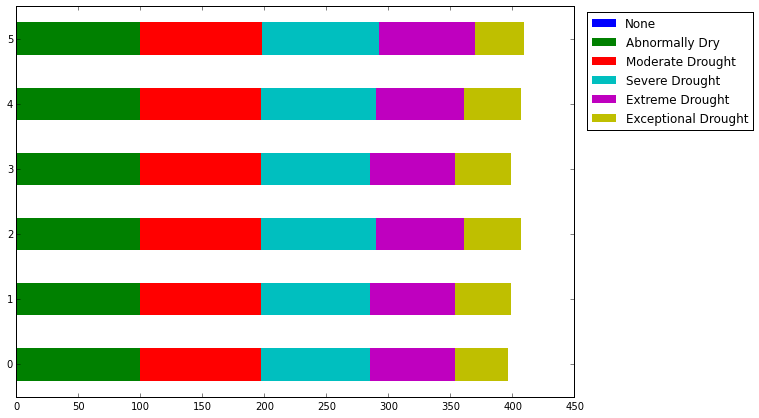

In [49]:
# Now You can plot it, but this plot soreley needs some decent annotating b
plt.figure();
df.plot(kind='barh', stacked=True, edgecolor='none', figsize=(10,7));

# Use bbox_to_anchor to place the legend outisde of the frame 
plt.legend(loc=1, bbox_to_anchor=(1.33, 1.0))


In [19]:
df

Series ID,Week,None,Abnormally Dry,Moderate Drought,Severe Drought,Extreme Drought,Exceptional Drought
0,Current2016-01-12,0.00,100.00,97.33,87.55,69.07,42.66
1,Last Week2016-01-05,0.00,100.00,97.33,87.55,69.07,44.84
2,3 Months Ago2015-10-13,0.14,99.86,97.33,92.36,71.08,46.00
3,Start of Calendar Year2015-12-29,0.00,100.00,97.33,87.55,69.07,44.84
4,Start of Water Year2015-09-29,0.14,99.86,97.33,92.36,71.08,46.00
5,One Year Ago2015-01-13,0.00,100.00,98.12,94.34,77.52,39.15
